## BANK CHURN DATA CLASSIFICATION PROJECT

### DATA EXPLORATION AND PREPROCESSING

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import statistics as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data
df = pd.read_csv("bankchurn.csv")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#checking size
df.shape

(10000, 13)

In [4]:
# column names
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
# datatypes of the columns
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df['Exited'] = df.Exited.astype('category')
df['IsActiveMember'] = df.IsActiveMember.astype('category')
df['HasCrCard'] = df.HasCrCard.astype('category')
df['Gender'] = df.Gender.astype('category')
df['Geography'] = df.Geography.astype('category')

In [7]:
df.dtypes

CustomerId            int64
Surname              object
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

In [8]:
# checking for nulls
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# checking for duplicates
df.duplicated().sum()

0

In [10]:
#checking the value counts for cat columns
df.Geography.value_counts()

France     5001
Germany    2502
Spain      2469
france        7
espanio       6
fra           6
ger           4
spain         2
GERMANY       1
germany       1
gernamy       1
Name: Geography, dtype: int64

In [11]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [13]:
#replacing str in Geography column
df=df.replace(to_replace=["france","fra"],value="France")

In [14]:
df=df.replace(to_replace=["ger","germany","gernamy","GERMANY"],value="Germany")

In [15]:
df=df.replace(to_replace=["espanio","spain"],value="Spain")

In [16]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [17]:
#outliers for Balance

maxi = df['Balance'].max()
print('Max ',maxi)
mini = df['Balance'].min()
print('Min ',mini)
ran = maxi -mini
print('Range', ran)
Q1=df['Balance'].quantile(0.25) 
Q3=df['Balance'].quantile(0.75) 
IQR=Q3-Q1 
print('IQR',IQR)
UF=Q3+1.5*IQR 
LF=Q1-1.5*IQR 
print('UF',UF)
print('LF',LF)

Max  250898.09
Min  0.0
Range 250898.09
IQR 127644.24
UF 319110.60000000003
LF -191466.36000000002


In [18]:
#outliers for EstimatedSalary

maxi = df['EstimatedSalary'].max()
print('Max ',maxi)
mini = df['EstimatedSalary'].min()
print('Min ',mini)
ran = maxi -mini
print('Range', ran)
Q1=df['EstimatedSalary'].quantile(0.25) 
Q3=df['EstimatedSalary'].quantile(0.75) 
IQR=Q3-Q1 
print('IQR',IQR)
UF=Q3+1.5*IQR 
LF=Q1-1.5*IQR 
print('UF',UF)
print('LF',LF)

Max  199992.48
Min  11.58
Range 199980.90000000002
IQR 98386.1375
UF 296967.45375
LF -96577.09624999999


In [19]:
#outliers for CreditScore

maxi = df['CreditScore'].max()
print('Max ',maxi)
mini = df['CreditScore'].min()
print('Min ',mini)
ran = maxi -mini
print('Range', ran)
Q1=df['CreditScore'].quantile(0.25) 
Q3=df['CreditScore'].quantile(0.75) 
IQR=Q3-Q1 
print('IQR',IQR)
UF=Q3+1.5*IQR 
LF=Q1-1.5*IQR 
print('UF',UF)
print('LF',LF)

Max  850
Min  350
Range 500
IQR 134.0
UF 919.0
LF 383.0


In [20]:
#outliers for Age

maxi = df['Age'].max()
print('Max ',maxi)
mini = df['Age'].min()
print('Min ',mini)
ran = maxi -mini
print('Range', ran)
Q1=df['Age'].quantile(0.25) 
Q3=df['Age'].quantile(0.75) 
IQR=Q3-Q1 
print('IQR',IQR)
UF=Q3+1.5*IQR 
LF=Q1-1.5*IQR 
print('UF',UF)
print('LF',LF)

Max  92
Min  18
Range 74
IQR 12.0
UF 62.0
LF 14.0


### EXPLORATORY DATA ANALYSIS

In [21]:
# count plot
def count_plot(data, c):
    fig, ax = plt.subplots(figsize = (12,6))
    ax.set_title(f'Count of {c}')
    at_count=data[c].value_counts()
    label=list(data[c].value_counts().index)
    colors = sns.color_palette('bright')
    sns.countplot(x = data[c],data=data,palette="Spectral",order=data[c].value_counts().index)
    for p in ax.patches:
            x=p.get_x()+p.get_width()/2
            y=p.get_height()
            ax.annotate(f'{y}',(x,y),weight='bold',va = 'bottom', ha ='center')
    plt.style.use('default')
    plt.show()

In [22]:
# pie chart
def pie(df, col):
    plt.subplots(figsize = (10,5), dpi = 100)
    colors = sns.color_palette('Set2')
    percentage = df[col].value_counts()
    labels = list(df[col].value_counts().index)
    plt.pie(percentage,labels = labels, autopct= "%0.2f%%", colors = colors,explode=[0.05,0.0])
    plt.title(col)

In [23]:
# box plot
def box_bivariate(df,col1,col2,color):
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df,x = col1,y = col2,palette=color)
    plt.title(f'{col2,col1} Distribution')

In [24]:
# bivariate count plot
def bivariate(df, col1, col2,color, flag = 0):
    fig, ax = plt.subplots(figsize = (10, 5))
    ax.set_title(f'Count of {col1}')
    sns.countplot(x = col1, hue = col2, data = df, palette=color)
    for p in ax.patches: 
        x=p.get_x()+p.get_width()/2
        y=p.get_height()
        if flag == 1:
            ax.annotate(f'{y}',(x,y),weight='bold',va = 'bottom', ha ='center')
    plt.show()

##### Gender

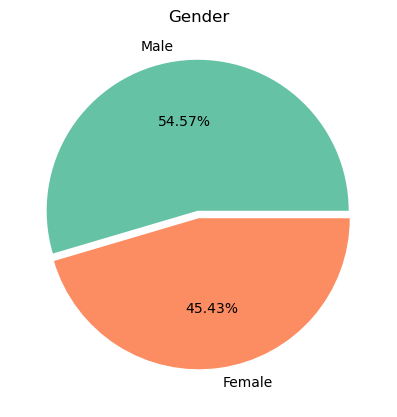

In [25]:
pie(df, 'Gender')

Male customers are more

##### Credit Card

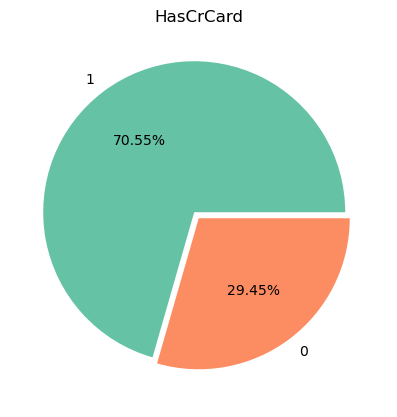

In [26]:
pie(df, 'HasCrCard')

Most of the customers have credit card

##### Active Member

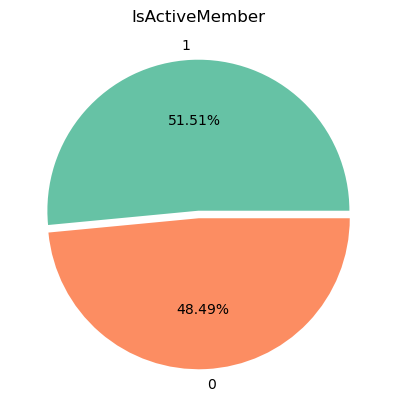

In [27]:
pie(df, 'IsActiveMember')

Almost 52 % of customers are active

##### Exited

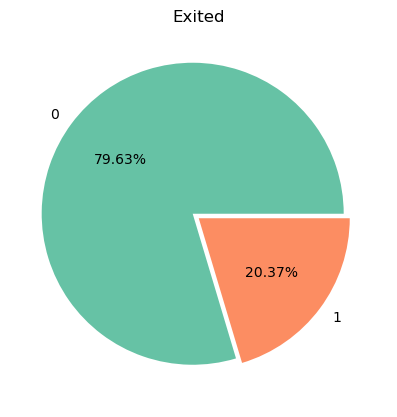

In [28]:
pie(df, 'Exited')

Around 20 % of customers are leaving

##### Geography

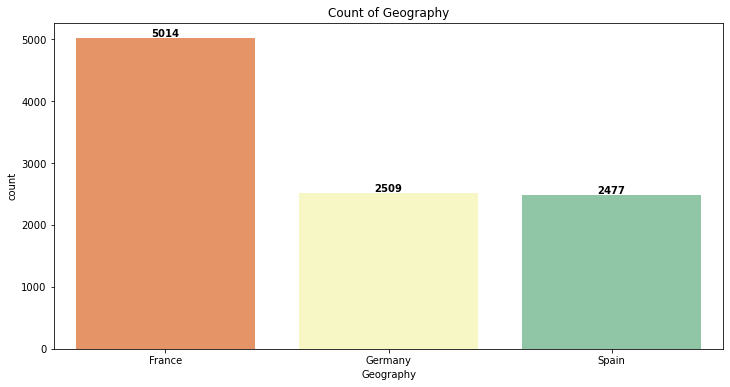

In [29]:
count_plot(df, 'Geography')

France has more customers

##### Tenure

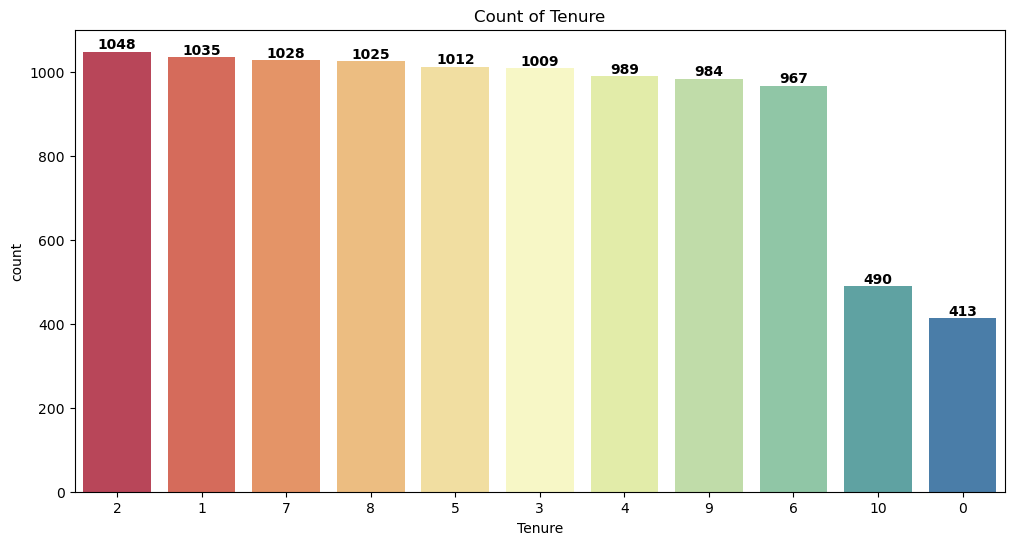

In [30]:
count_plot(df, 'Tenure')

Customers have atleast 6 years of tenure

##### No of Products

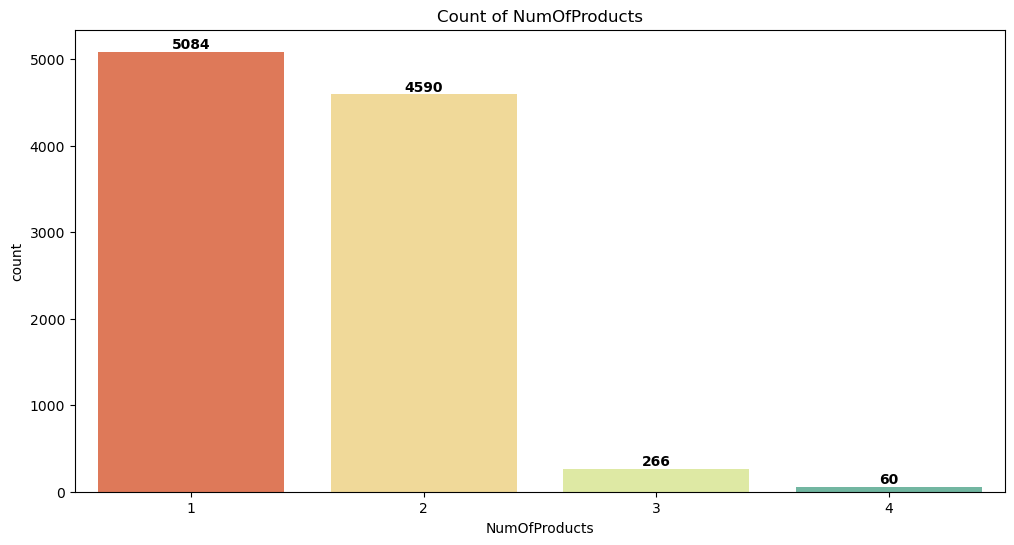

In [31]:
count_plot(df, 'NumOfProducts')

Most of the customers atleast have 1 or 2 products

##### GENDER

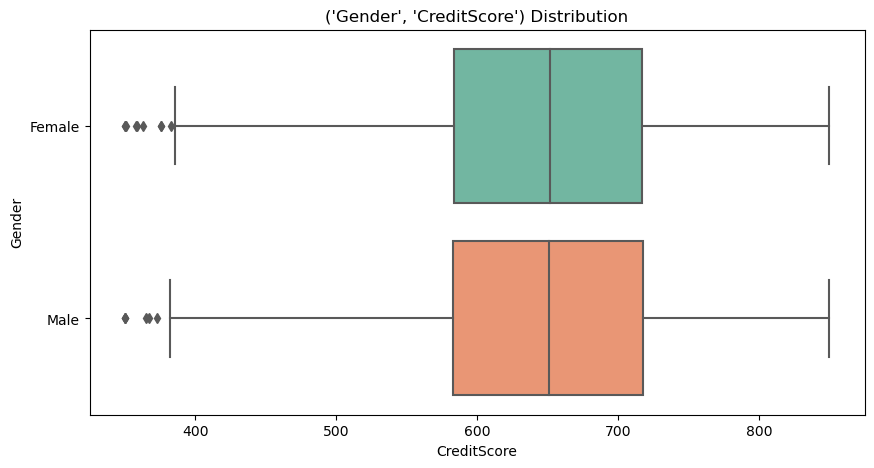

In [32]:
box_bivariate(df,'CreditScore','Gender','Set2')

Both the males and females have a credit score of 590 to 720

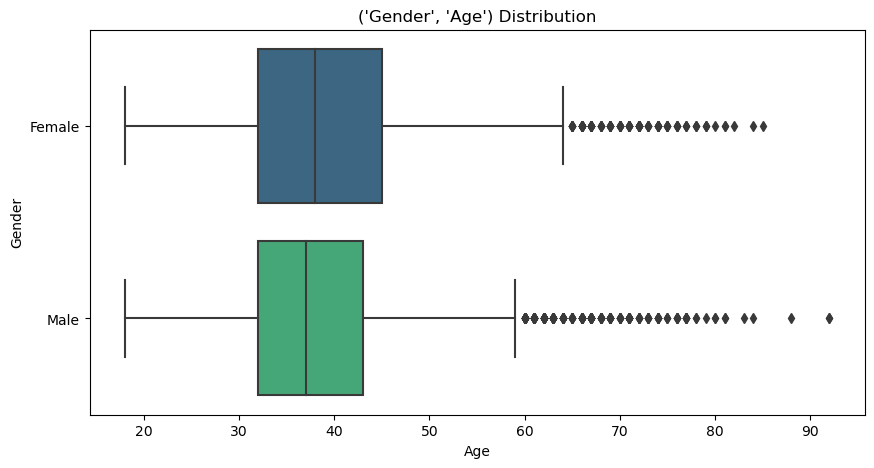

In [33]:
box_bivariate(df,'Age','Gender','viridis')

female customers have age around 32 to 45 and male customers have age around 32 to 42

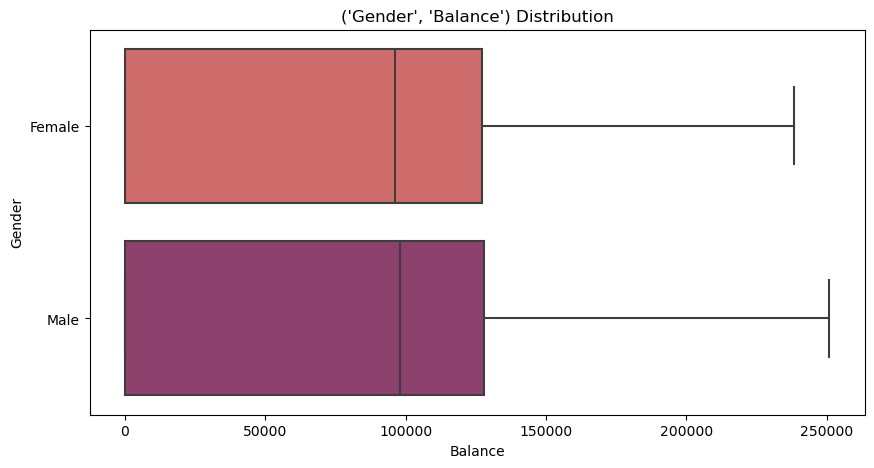

In [34]:
box_bivariate(df,'Balance','Gender','flare')

both male and female have balance upto 1,25,000

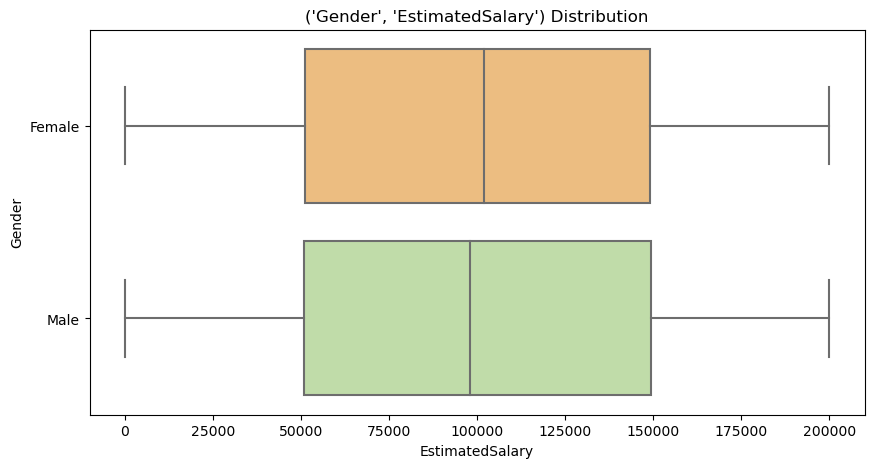

In [35]:
box_bivariate(df,'EstimatedSalary','Gender','Spectral')

both male and female have an estimated salary around 50k and 150k

##### EXITED

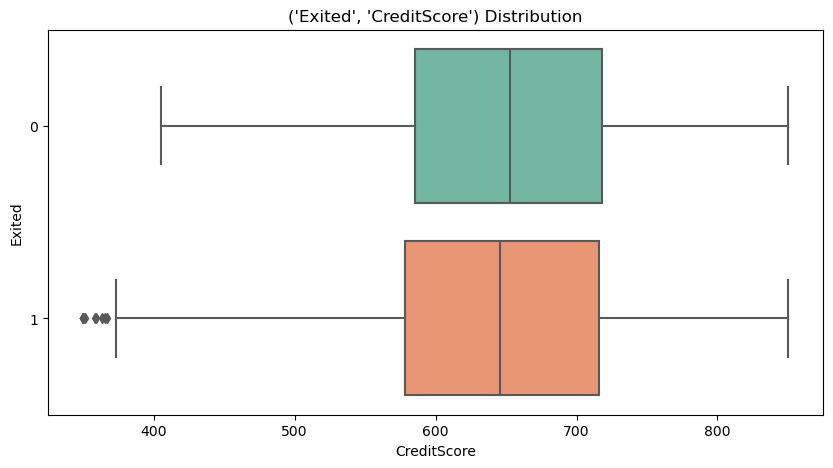

In [36]:
box_bivariate(df,'CreditScore','Exited','Set2')

customers who are leaving have a credit score between 600 and 700

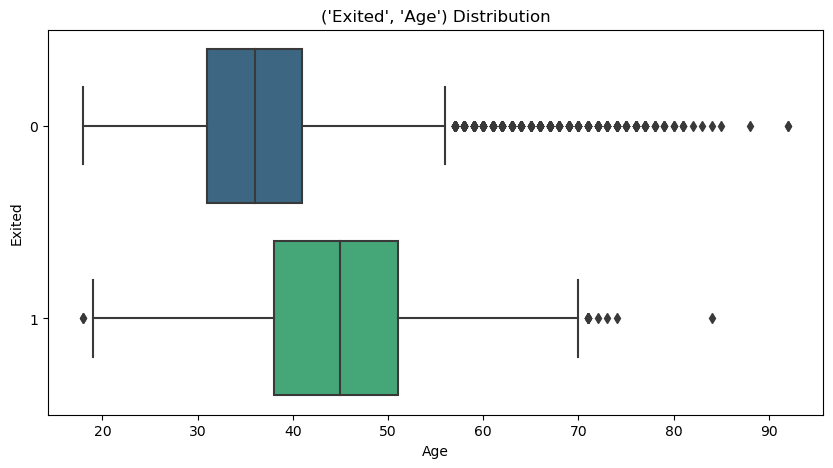

In [37]:
box_bivariate(df,'Age','Exited','viridis')

customers who are leaving are of the age group 30 - 40

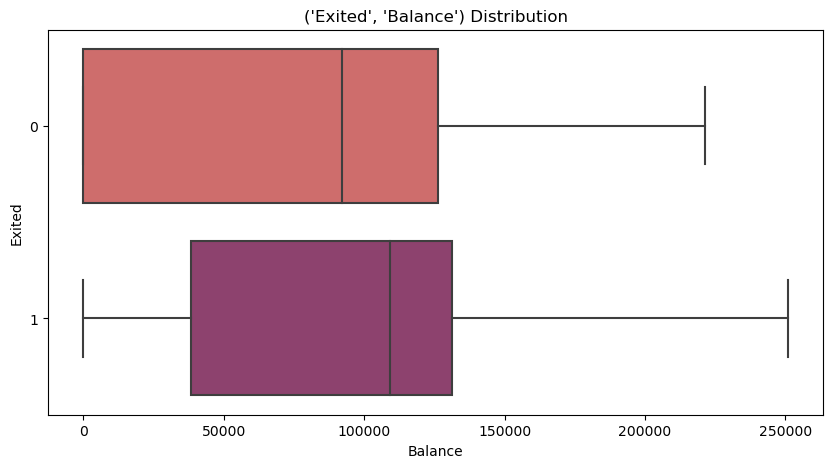

In [38]:
box_bivariate(df,'Balance','Exited','flare')

customers who are leaving have balance around 70 k

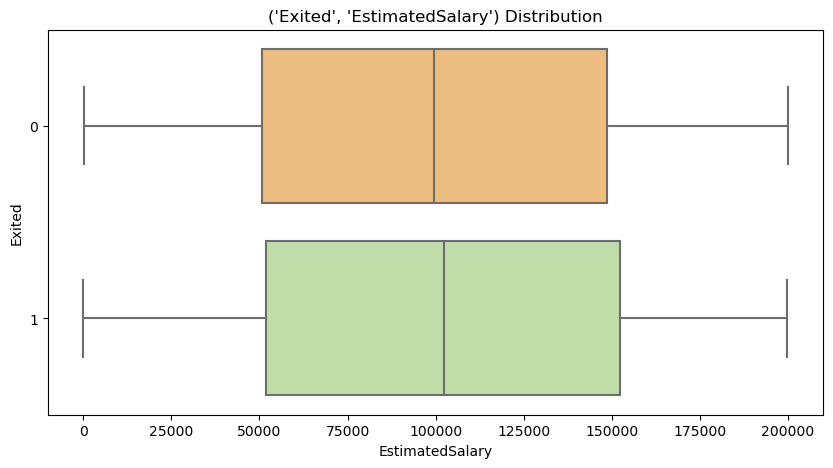

In [39]:
box_bivariate(df,'EstimatedSalary','Exited','Spectral')

all the customers have the same estimated salary

##### ACTIVE MEMBER

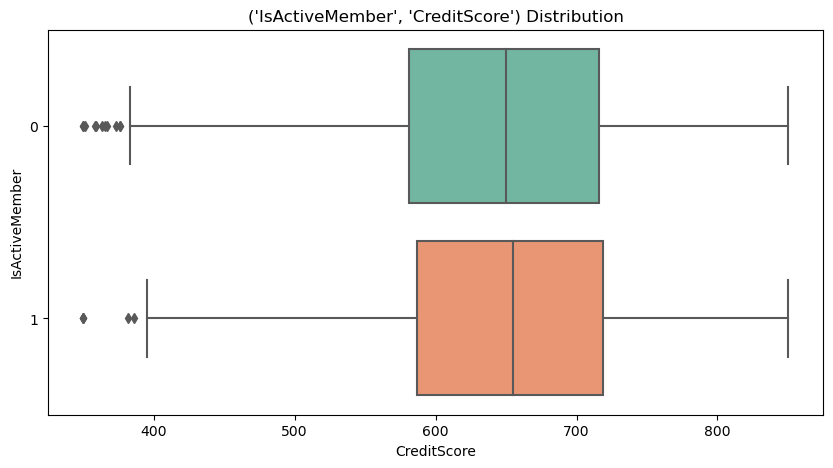

In [40]:
box_bivariate(df,'CreditScore','IsActiveMember','Set2')

all the customers have a credit score between 600 and 700

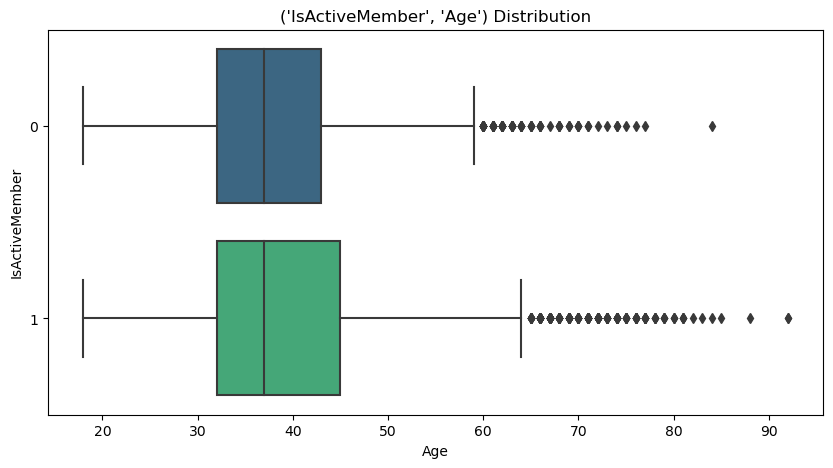

In [41]:
box_bivariate(df,'Age','IsActiveMember','viridis')

less active members are of the age 30 to 42

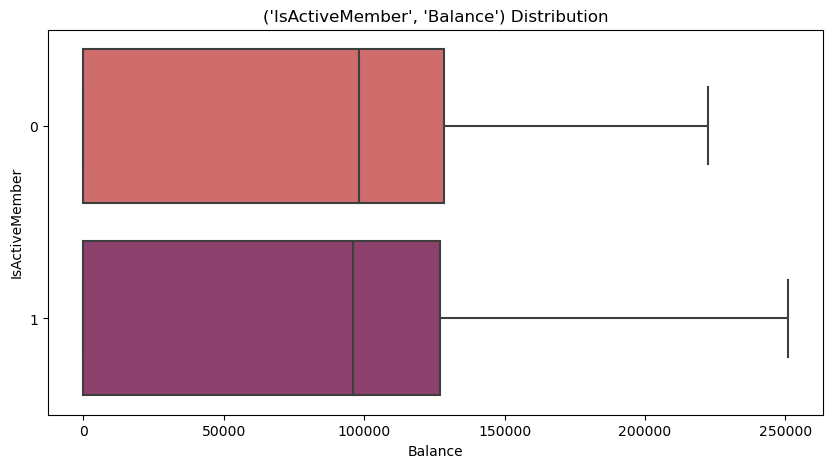

In [42]:
box_bivariate(df,'Balance','IsActiveMember','flare')

all the customers have same balance amount distribution

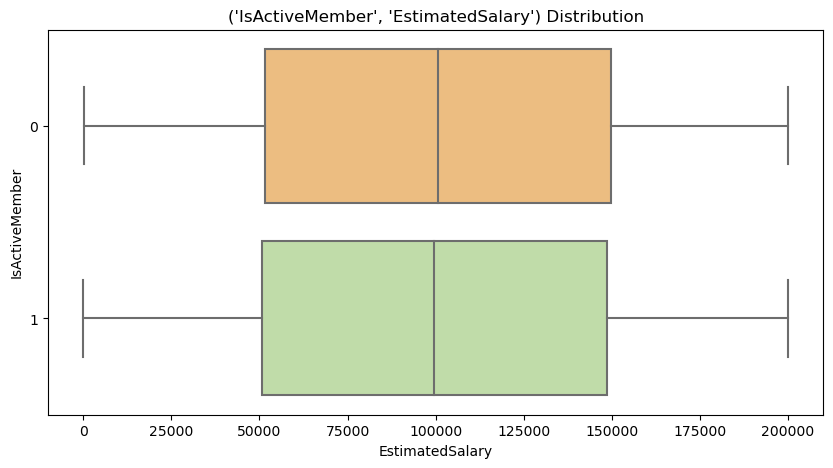

In [43]:
box_bivariate(df,'EstimatedSalary','IsActiveMember','Spectral')

estimated salary is same for both type of customers

##### CREDIT CARD

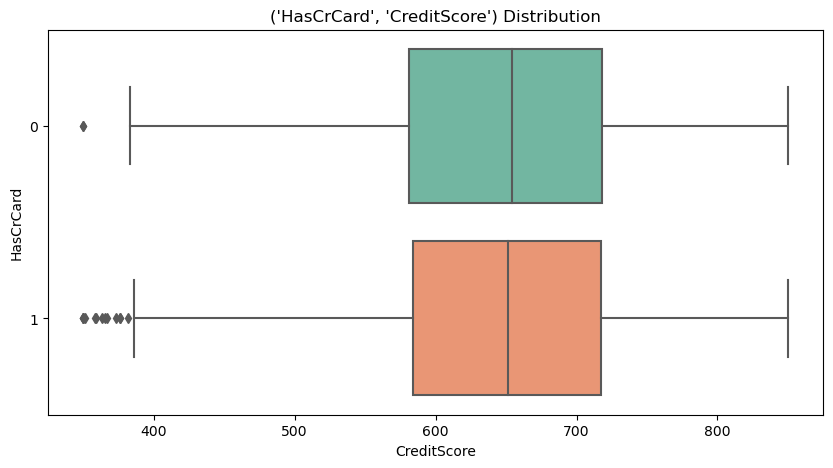

In [44]:
box_bivariate(df,'CreditScore','HasCrCard','Set2')

both type of customers have a credit score between 600 and 700

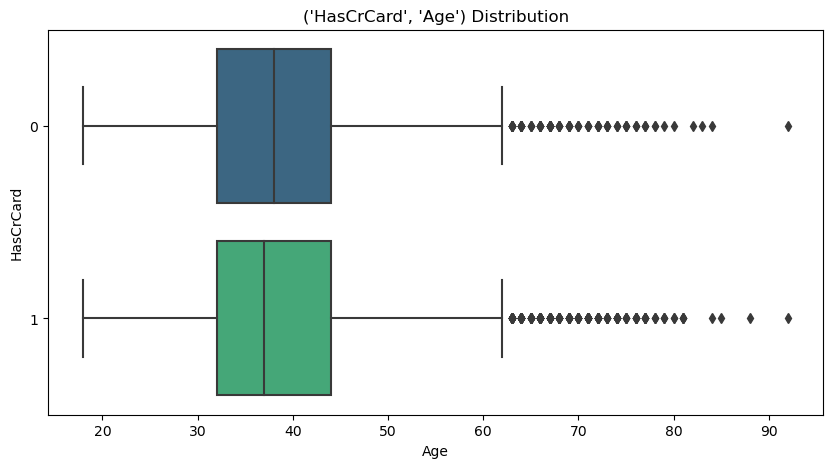

In [45]:
box_bivariate(df,'Age','HasCrCard','viridis')

both type of customers belong to the 30 to 45 age group

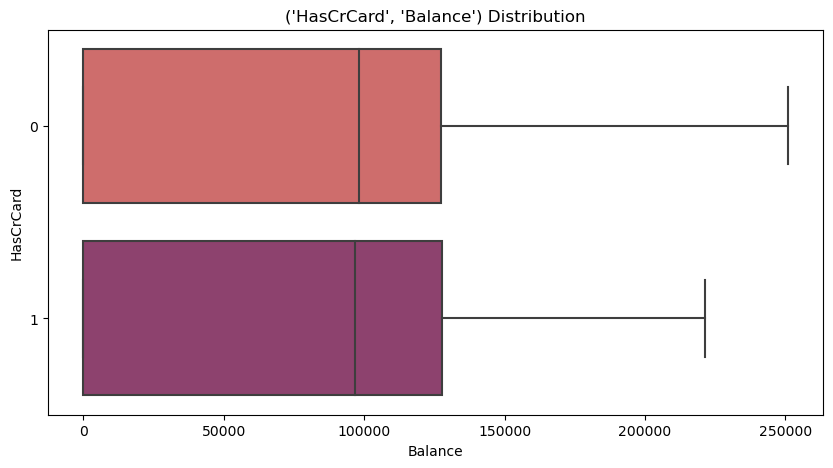

In [46]:
box_bivariate(df,'Balance','HasCrCard','flare')

the balance amount distribution is same for both type of customers 

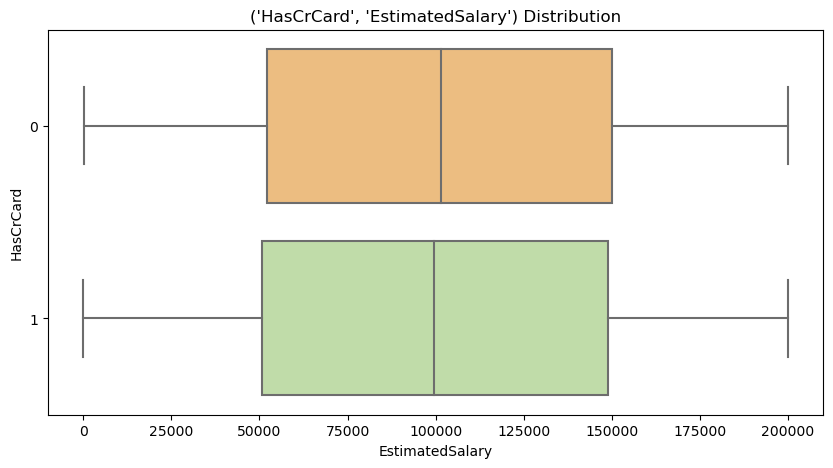

In [47]:
box_bivariate(df,'EstimatedSalary','HasCrCard','Spectral')

the estimated salary is same for both type of customers

##### GENDER WISE

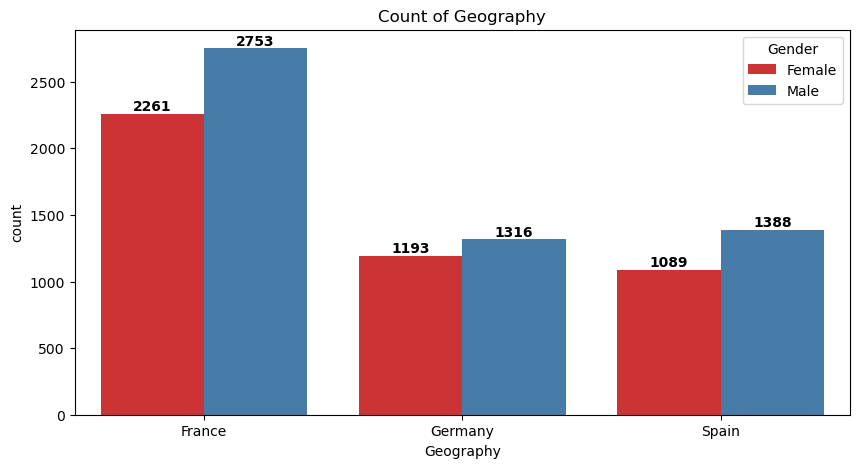

In [48]:
bivariate(df, 'Geography', 'Gender','Set1', flag = 1)

france has the most no of male and female customers

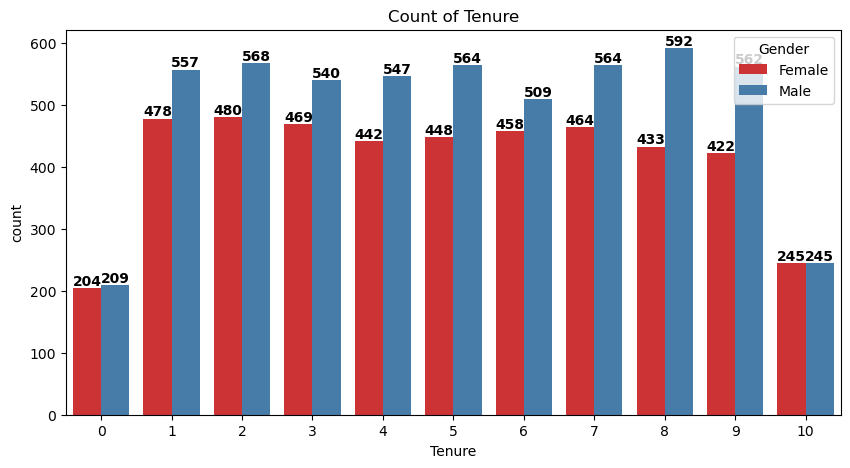

In [49]:
bivariate(df, 'Tenure', 'Gender','Set1', flag = 1)

males who have 10 years of tenure are comparitively less

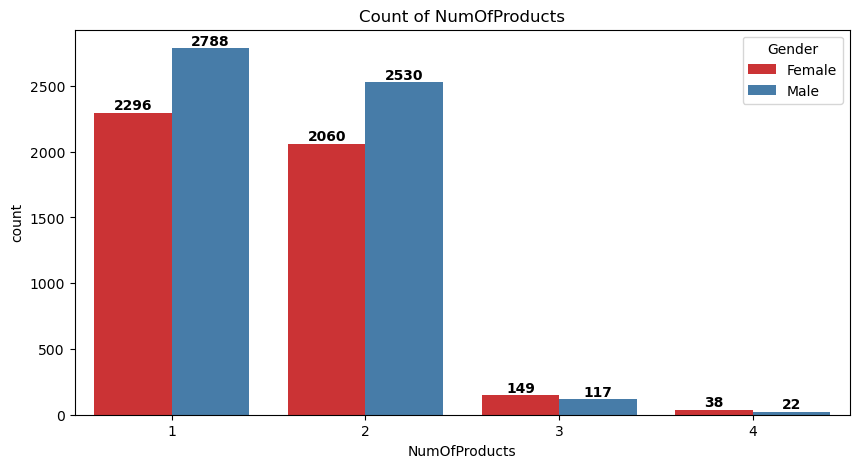

In [50]:
bivariate(df, 'NumOfProducts', 'Gender','Set1', flag = 1)

male and female customers have atleast 1 or 2 products

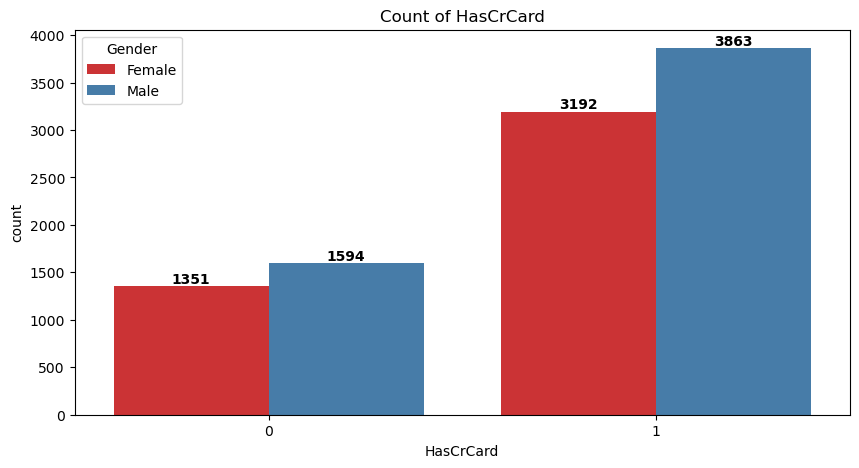

In [51]:
bivariate(df, 'HasCrCard', 'Gender','Set1', flag = 1)

more males dont have credit cards when compared to female

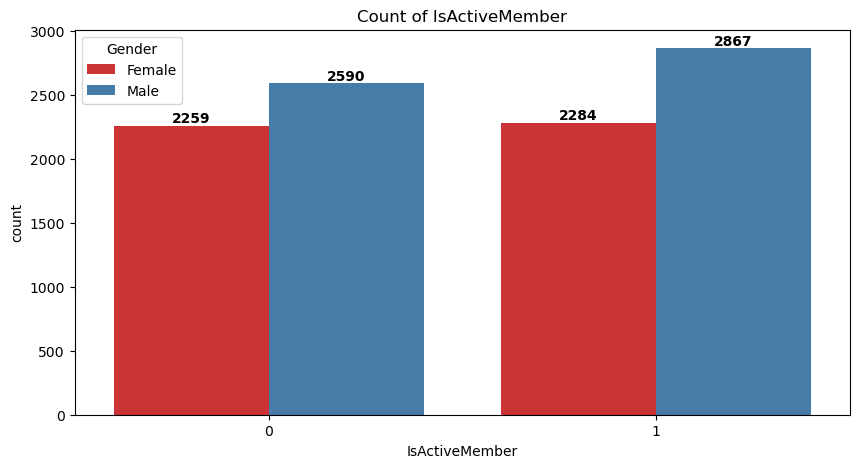

In [52]:
bivariate(df, 'IsActiveMember', 'Gender','Set1',flag = 1)

almost both female and male customers are equally active and non active

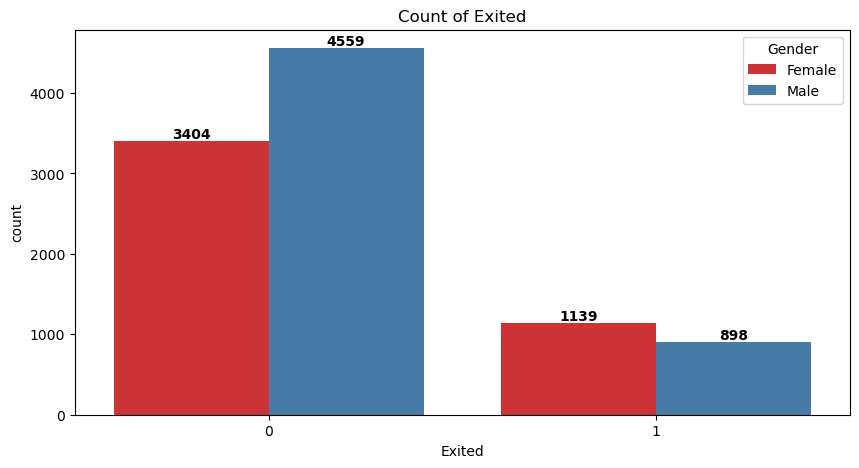

In [53]:
bivariate(df, 'Exited', 'Gender', 'Set1',flag = 1)

we can see that female customers are more likely to leave

##### ATTRITION WISE

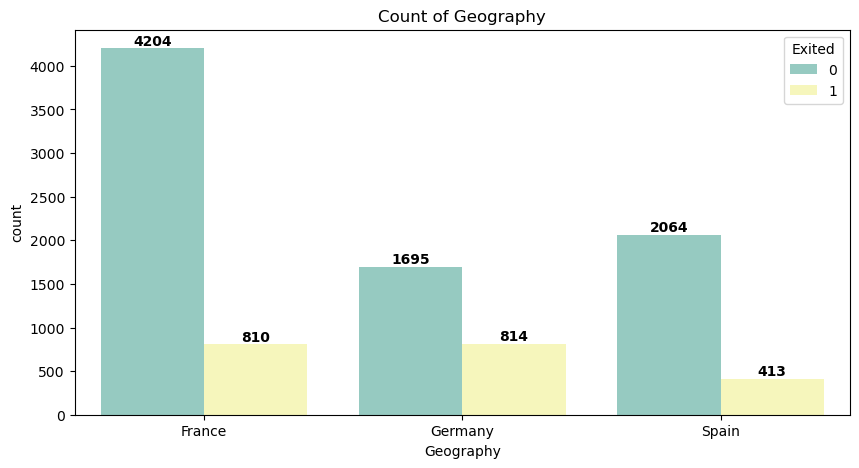

In [54]:
bivariate(df, 'Geography', 'Exited', 'Set3',flag = 1)

customers from germany are more likely to leave

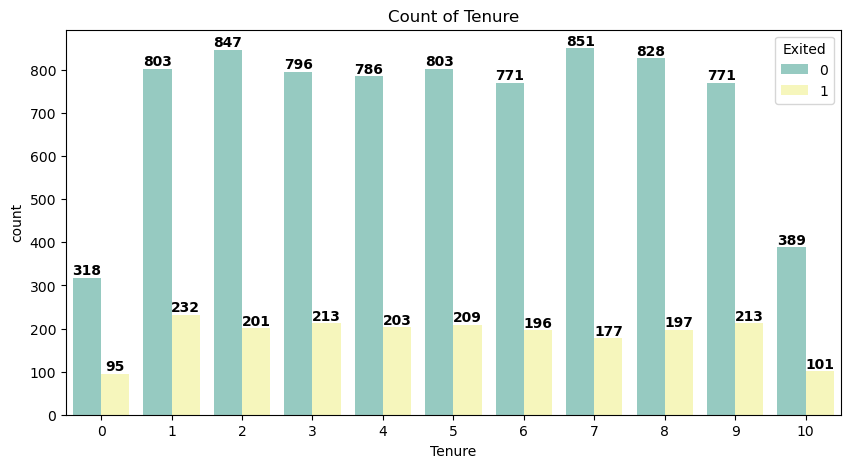

In [55]:
bivariate(df, 'Tenure', 'Exited','Set3', flag = 1)

customers who have atleast 5 years of tenure are more likely to leave

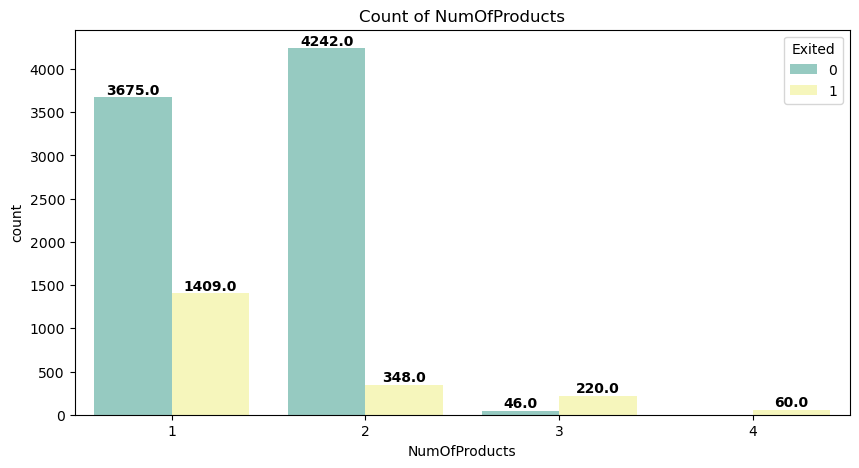

In [56]:
bivariate(df, 'NumOfProducts', 'Exited','Set3', flag = 1)

customers who atleast have 1 product are more likely to leave

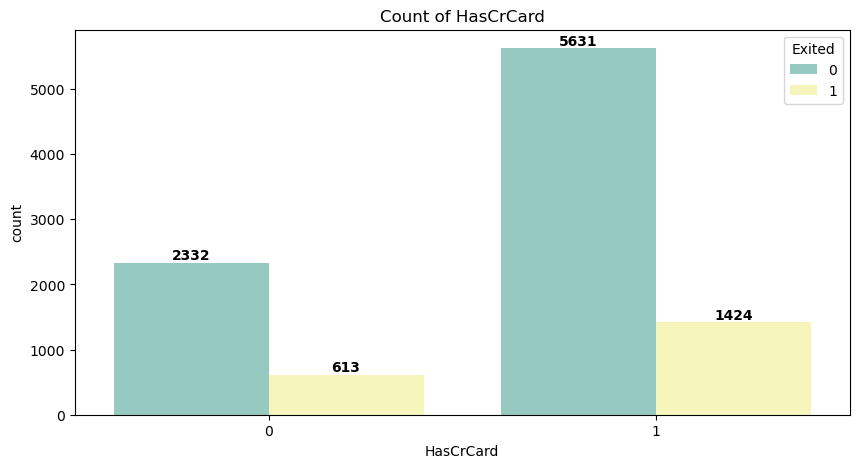

In [57]:
bivariate(df, 'HasCrCard', 'Exited','Set3', flag = 1)

cusotmers who have credit card are more likely to leave

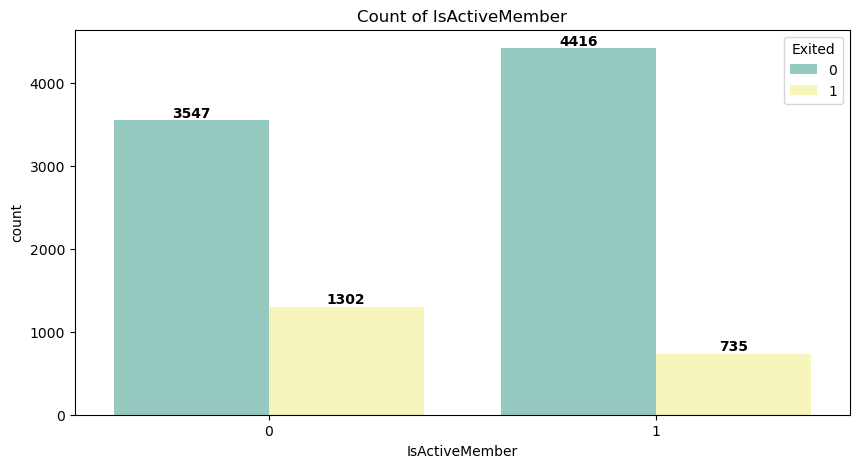

In [58]:
bivariate(df, 'IsActiveMember', 'Exited','Set3', flag = 1)

inactive customers are more likely to leave

##### ACTIVE MEMBER WISE

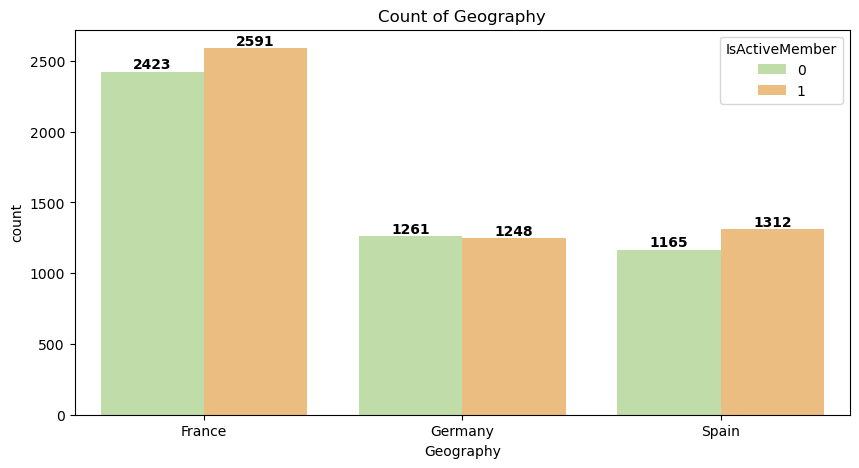

In [59]:
bivariate(df, 'Geography', 'IsActiveMember','Spectral_r', flag = 1)

france has the most active customers

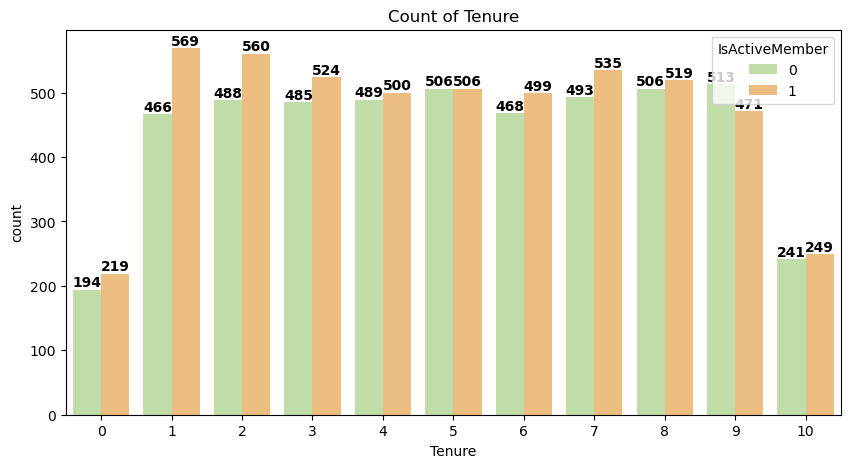

In [60]:
bivariate(df, 'Tenure', 'IsActiveMember','Spectral_r', flag = 1)

customers who have 10 years of tenure are less active

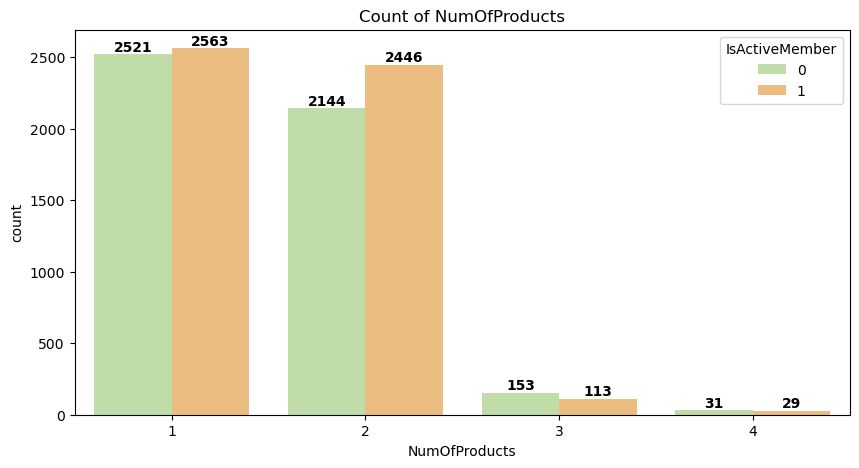

In [61]:
bivariate(df, 'NumOfProducts', 'IsActiveMember','Spectral_r', flag = 1)

non active members have atleast 1 or 2 products

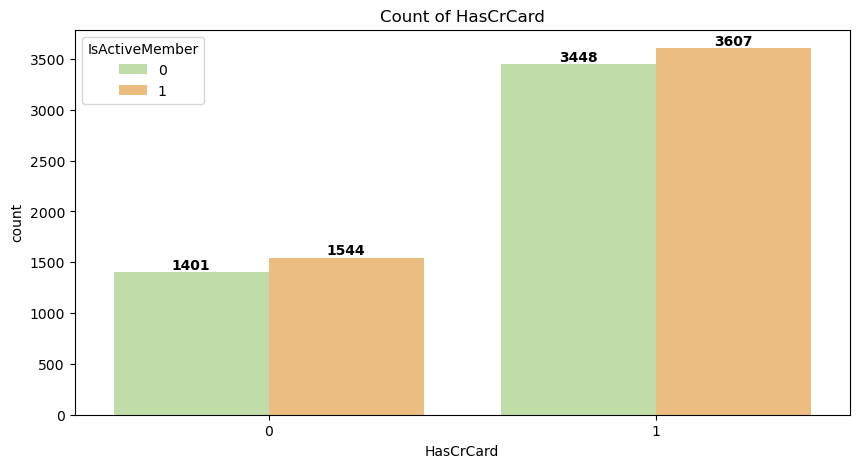

In [62]:
bivariate(df, 'HasCrCard', 'IsActiveMember','Spectral_r', flag = 1)

most non active members have credit card

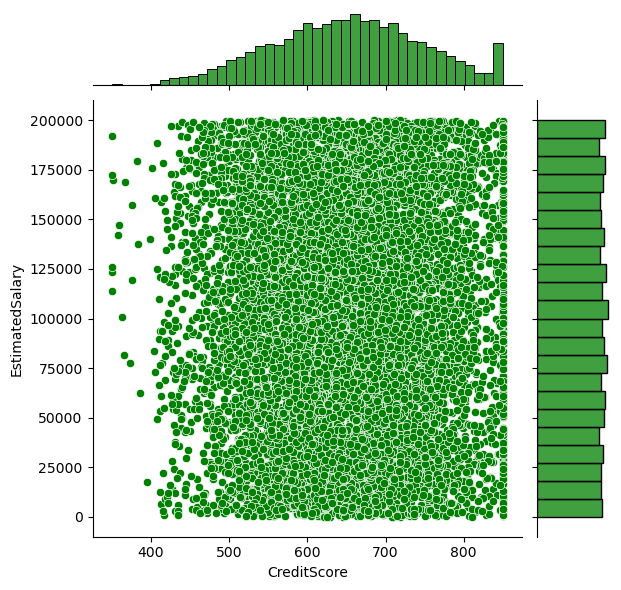

In [63]:
sns.jointplot(data= df, x= 'CreditScore', y= 'EstimatedSalary',color='green');

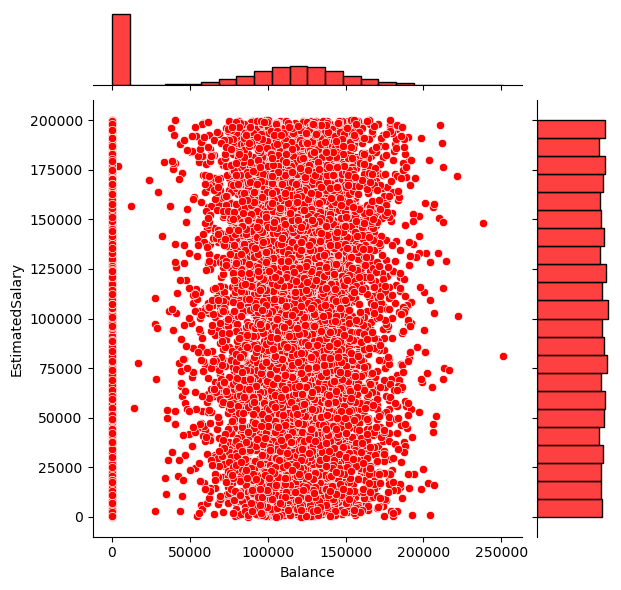

In [64]:
sns.jointplot(data= df, x= 'Balance', y= 'EstimatedSalary',color='red');

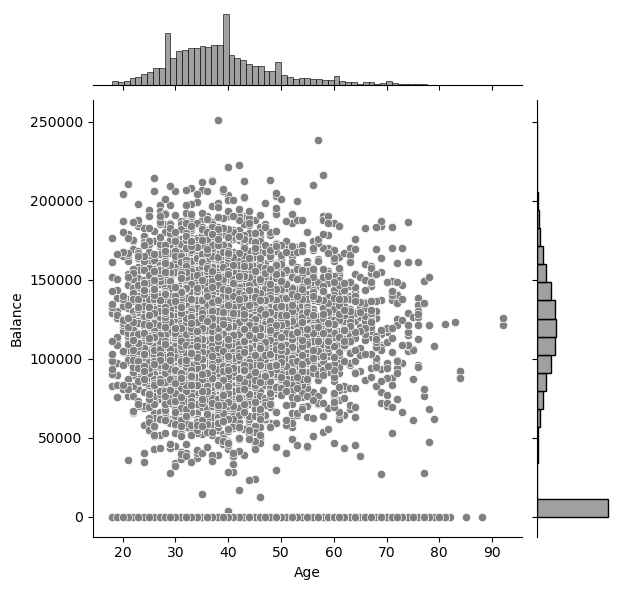

In [65]:
sns.jointplot(data= df, x= 'Age', y= 'Balance',color='gray');

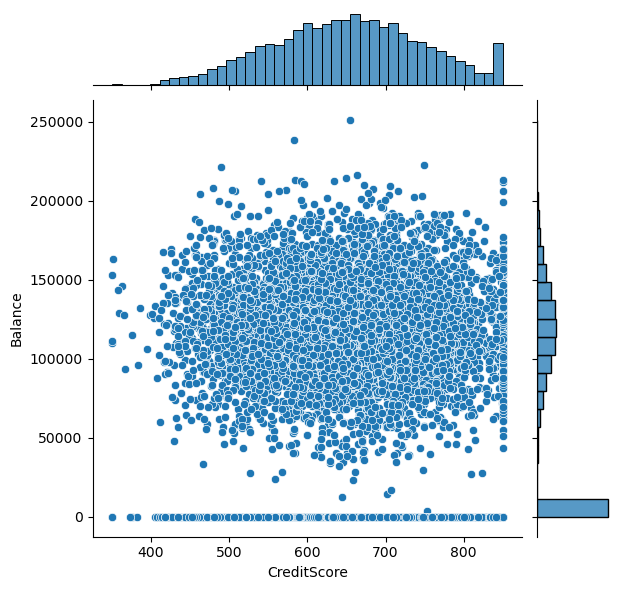

In [66]:
sns.jointplot(data= df, x= 'CreditScore', y= 'Balance');

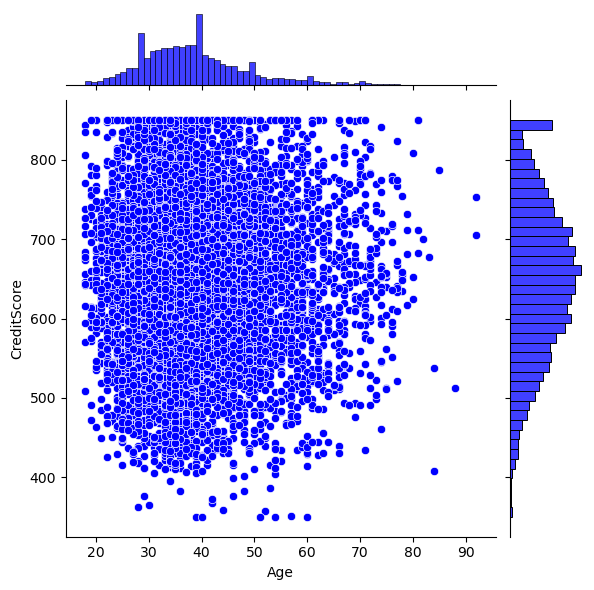

In [67]:
sns.jointplot(data= df, x= 'Age', y= 'CreditScore',color='blue');

### DUMMY ENCODING

In [68]:
# dropping unecessary columns
df.drop(columns=['CustomerId','Surname'],inplace=True)

In [69]:
df.shape

(10000, 11)

In [70]:
df_corr = df

In [71]:
df['Exited'] = df.Exited.astype('int64')

In [72]:
#Encoding department
Geography_dummies = pd.get_dummies(df.Geography, prefix="Geography")
df_with_dummies = pd.concat([df,Geography_dummies],axis='columns')
df_with_dummies.drop('Geography',axis='columns',inplace=True)
#Encoding Work_accident
Gender_dummies = pd.get_dummies(df.Gender, prefix="Gender")
df_with_dummies = pd.concat([df_with_dummies,Gender_dummies],axis='columns')
df_with_dummies.drop('Gender',axis='columns',inplace=True)

In [73]:
df_with_dummies

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [74]:
df_with_dummies.dtypes

CreditScore             int64
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard            category
IsActiveMember       category
EstimatedSalary       float64
Exited                  int64
Geography_France        uint8
Geography_Germany       uint8
Geography_Spain         uint8
Gender_Female           uint8
Gender_Male             uint8
dtype: object

### FEATURE SELECTION

In [75]:
from sklearn.feature_selection import f_classif as fs

In [76]:
x = df_with_dummies.drop('Exited',1)
y = df_with_dummies['Exited']

In [77]:
features = x.columns

In [78]:
fscore,pvalue = fs(x,y)

In [79]:
fs_df = pd.DataFrame({'feature':features,'score':fscore,'pvalue':pvalue})

In [80]:
fs_df.sort_values('score',ascending = False)

,feature,score,pvalue
1,Age,886.063275,1.239931e-186
9,Geography_Germany,310.258384,2.059537e-68
6,IsActiveMember,249.800794,1.348269e-55
3,Balance,142.473832,1.275563e-32
11,Gender_Female,114.727989,1.258505e-26
12,Gender_Male,114.727989,1.258505e-26
8,Geography_France,111.360517,6.748446e-26
10,Geography_Spain,27.809468,1.366655e-07
4,NumOfProducts,22.915223,1.717333e-06
0,CreditScore,7.344522,6.738214e-03


we can see that Age, IsActiveMember,Balance,Gender_Female,Gender_Male,Geography_Germany,Geography_France	 are the columns affeccting the target column most

### DATA SCALING

In [81]:
# min-max scaler
scale=MinMaxScaler()
df_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
df_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0,1.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,1.0,0.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0,1.0,0.0


In [82]:
#label encoding
label_encoder = preprocessing.LabelEncoder()
for i in df_corr.columns:
    if df_corr[i].dtypes=="category":
        df_corr[i]=label_encoder.fit_transform(df_corr[i])

In [83]:
# correlation chart
df_corr.corr().style.background_gradient(cmap="gist_gray_r")

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


we can see that Balance, Age, NumOfProducts,IsActiveMember columns have high correlation with all other columns and 
Exited column is mostly affected by Age and Gender. 

### DEFINING TARGET AND INDEPENDENT COLUMNS

In [84]:
x0 = df_scaled
y0 = df['Exited']

### LOGISTIC REGRESSION

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [87]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [89]:
def con_matrix(y_test,y_pred):
    print(confusion_matrix(y_test,y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    print('\n')
    print('TN:',tn, 'FP:',fp, 'FN:',fn,'TP:', tp)

In [90]:
def evaluation(y_test,y_pred):
    print('accuracy:', accuracy_score(y_test, y_pred))
    print('recall:', recall_score(y_test, y_pred))
    print('f1-score:', f1_score(y_test, y_pred))
    print('precision:', precision_score(y_test, y_pred))

In [91]:
def ROC_AUC(x_test,y_test, y_pred,model):
    roc=roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
    print("ROC: ",roc)
    auc = roc_auc_score(y_test, y_pred)
    print("AUC: ",auc)

In [92]:
def ROC_curve(x_test,y_test, y_pred,model,model_name):
    ns_probs = [0 for _ in range(len(y_test))]
    lr_probs = model.predict_proba(x_test)
    lr_probs = lr_probs[:,1]
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print(str(model_name),': ROC AUC=%.3f' % (lr_auc))
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=str(model_name))
    plt.title(f'{model_name} ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [93]:
def crossval(model,x,y):
    classf = model
    cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=3)
    scores1 = cross_val_score(classf,x,y,cv=cv,n_jobs=-1, error_score='raise',scoring='accuracy')
    scores2 = cross_val_score(classf,x,y,cv=cv,n_jobs=-1, error_score='raise',scoring='f1')
    print("Accuracy: ",scores1.mean())
    print("F1_score: ",scores2.mean())

In [94]:
#feature selection

x1 = x0
y1 = y0

In [95]:
#splitting

x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,train_size=0.70,random_state=100)
print("shape of the train and test dataset: ",x1_train.shape,x1_test.shape)

shape of the train and test dataset:  (7000, 13) (3000, 13)


In [96]:
#building the model

logreg=LogisticRegression().fit(x1_train,y1_train)

In [97]:
#predictions

y_pred1=logreg.predict(x1_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
#Train accuracy

print('Train Score :',logreg.score(x1_train, y1_train))

Train Score : 0.8122857142857143


In [99]:
#Test accuracy

print('Test Score :',logreg.score(x1_test, y1_test))

Test Score : 0.813


In [100]:
#confusion matrix

con_matrix(y1_test,y_pred1)

[[2320   56]
 [ 505  119]]


TN: 2320 FP: 56 FN: 505 TP: 119


In [101]:
#evaluation

evaluation(y1_test,y_pred1)

accuracy: 0.813
recall: 0.1907051282051282
f1-score: 0.2978723404255319
precision: 0.68


In [102]:
#ROC and AUC

ROC_AUC(x1_test,y1_test, y_pred1,logreg)

ROC:  0.7713324484157817
AUC:  0.5835680523180523


No Skill: ROC AUC=0.500
Logistic_Regression : ROC AUC=0.771


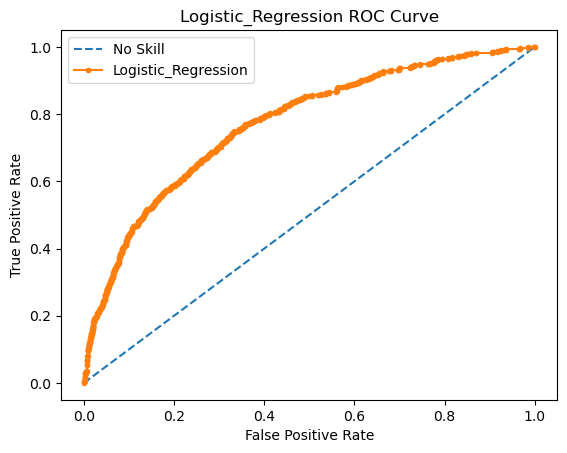

In [103]:
#ROC Curve

ROC_curve(x1_test,y1_test, y_pred1,logreg,'Logistic_Regression')

#### Crossvalidation

In [104]:
crossval(LogisticRegression(),x1,y1)

Accuracy:  0.8109333333333333
F1_score:  0.3061843869481867


### NAIVE BAYES

In [105]:
from sklearn.naive_bayes import GaussianNB

In [106]:
#feature selection

x2 = x0
y2 = y0

In [107]:
#splitting

x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,train_size=0.70,random_state=100)
print("shape of the train and test dataset: ",x2_train.shape,x2_test.shape)

shape of the train and test dataset:  (7000, 13) (3000, 13)


In [108]:
# building model

nb_clf = GaussianNB().fit(x2_train, y2_train) 

In [109]:
#predictions

y_pred2=nb_clf.predict(x2_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [110]:
#Train accuracy

print('Train Score :',nb_clf.score(x2_train, y2_train))

Train Score : 0.8158571428571428


In [111]:
#Test accuracy

print('Test Score :',nb_clf.score(x2_test, y2_test))

Test Score : 0.821


In [112]:
#Confusion matrix

con_matrix(y2_test,y_pred2)

[[2231  145]
 [ 392  232]]


TN: 2231 FP: 145 FN: 392 TP: 232


In [113]:
#Evaluation

evaluation(y2_test,y_pred2)

accuracy: 0.821
recall: 0.3717948717948718
f1-score: 0.46353646353646355
precision: 0.6153846153846154


In [114]:
#ROC and AUC

ROC_AUC(x2_test,y2_test, y_pred2,nb_clf)

ROC:  0.7959367985409652
AUC:  0.6553839678839679


No Skill: ROC AUC=0.500
Naive Bayes : ROC AUC=0.796


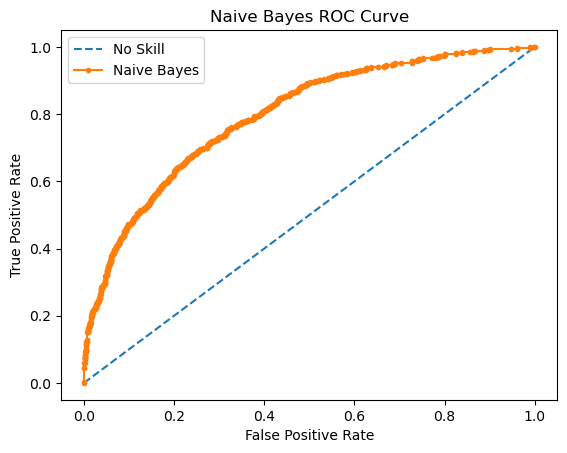

In [115]:
#ROC Curve

ROC_curve(x2_test,y2_test, y_pred2,nb_clf,'Naive Bayes')

##### Crossvalidation

In [116]:
crossval(GaussianNB(),x2,y2)

Accuracy:  0.8138
F1_score:  0.4501927133262839


### DECISION TREE CLASSIFIER

In [117]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
#feature selection

x3 = x0
y3 = y0

In [119]:
#splitting

x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,train_size=0.70,random_state=100)
print("shape of the train and test dataset: ",x3_train.shape,x3_test.shape)

shape of the train and test dataset:  (7000, 13) (3000, 13)


In [120]:
# building model

dtm = DecisionTreeClassifier(max_depth=3).fit(x3_train,y3_train)

In [121]:
#predictions

y_pred3=dtm.predict(x3_test)
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
#Train Accuracy

print('Train Score :',dtm.score(x3_train, y3_train))

Train Score : 0.8432857142857143


In [123]:
#Test Accuracy
print('Test Score :',dtm.score(x3_test, y3_test))

Test Score : 0.832


In [124]:
#Confusion Matrix

con_matrix(y3_test,y_pred3)

[[2355   21]
 [ 483  141]]


TN: 2355 FP: 21 FN: 483 TP: 141


In [125]:
#Evaluation

evaluation(y3_test,y_pred3)

accuracy: 0.832
recall: 0.22596153846153846
f1-score: 0.3587786259541985
precision: 0.8703703703703703


In [126]:
#ROC and AUC

ROC_AUC(x3_test,y3_test, y_pred3,dtm)

ROC:  0.7857919472502806
AUC:  0.6085615773115773


No Skill: ROC AUC=0.500
Decission Tree : ROC AUC=0.786


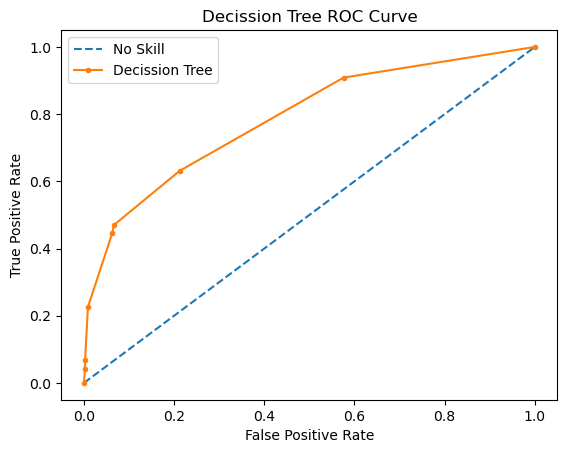

In [127]:
#ROC Curve

ROC_curve(x3_test,y3_test, y_pred3,dtm,'Decission Tree')

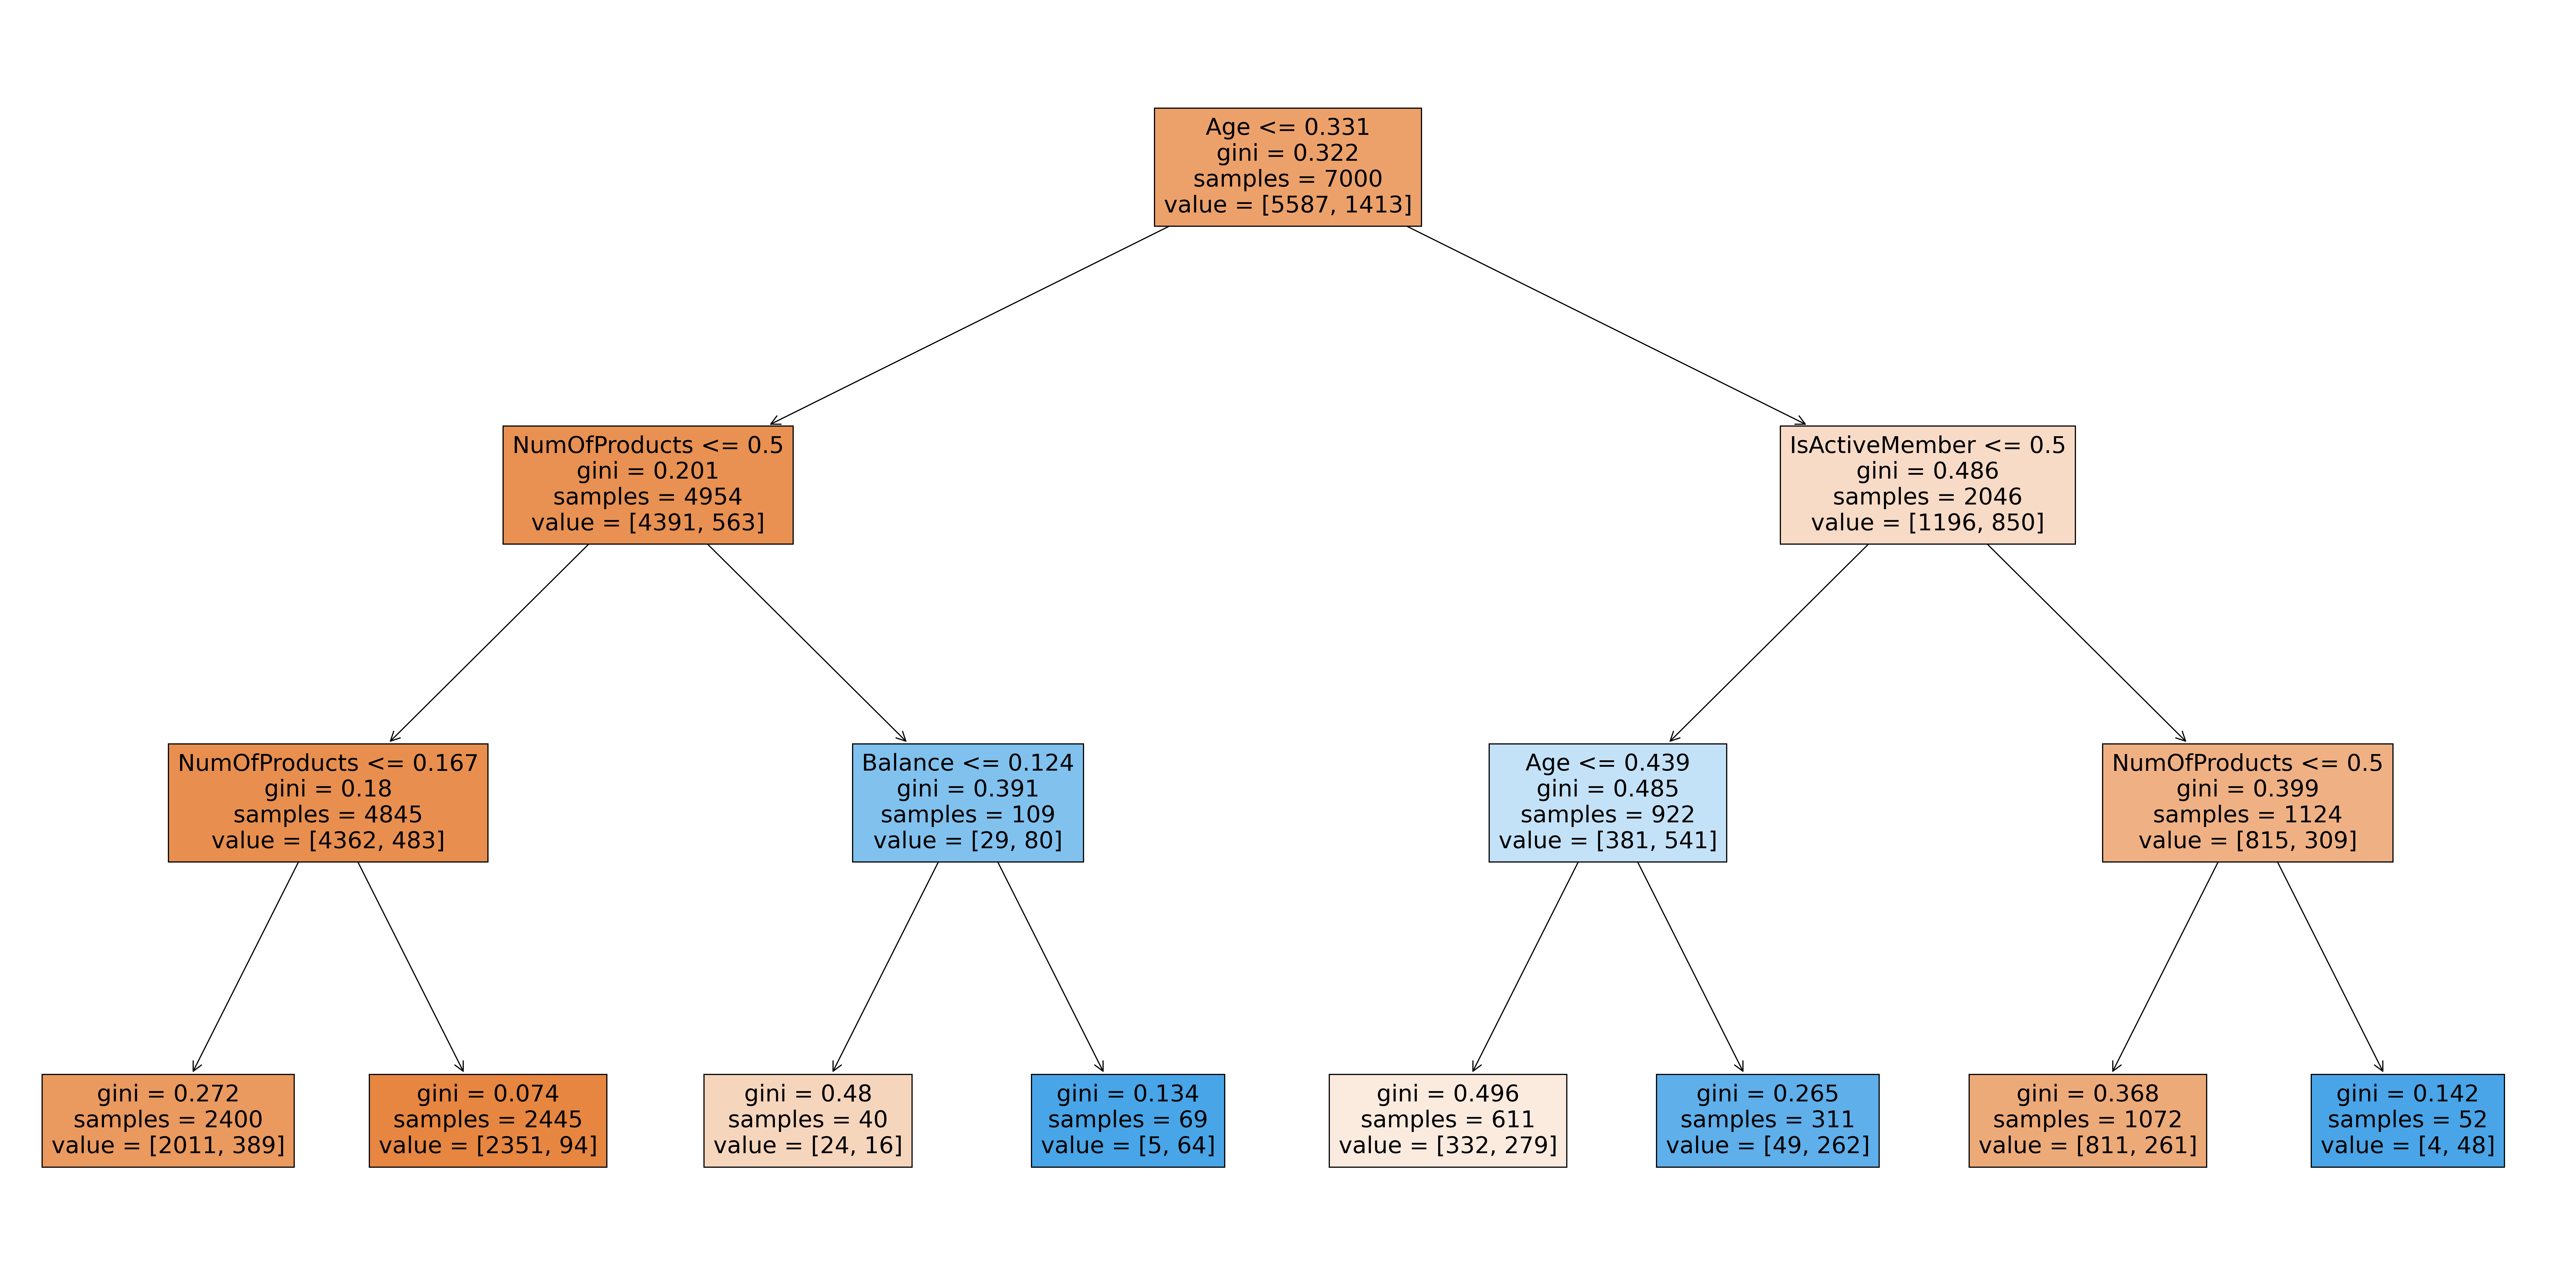

In [128]:
#plotting tree

from sklearn import tree

fig,ax=plt.subplots(1,1,figsize=(40,20),dpi=300)
tree.plot_tree(dtm,feature_names=x3_train.columns,filled=True)
plt.show()

##### Crossvalidation

In [129]:
crossval(DecisionTreeClassifier(),x3,y3)

Accuracy:  0.7907999999999998
F1_score:  0.4955830680327368


### RANDOM FORREST CLASSIFIER

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [131]:
#feature selection

x4 = x0
y4 = y0

In [132]:
#splitting

x4_train,x4_test,y4_train,y4_test=train_test_split(x4,y4,train_size=0.70,random_state=100)
print("shape of the train and test dataset: ",x4_train.shape,x4_test.shape)

shape of the train and test dataset:  (7000, 13) (3000, 13)


In [133]:
# building model

rf_model=RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True).fit(x4_train,y4_train)

In [134]:
#predictions

y_pred4=rf_model.predict(x4_test)
y_pred4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [135]:
#Train Accuracy

print('Train Score :',rf_model.score(x4_train, y4_train))

Train Score : 0.8477142857142858


In [136]:
#Test Accuracy

print('Test Score :',rf_model.score(x4_test, y4_test))

Test Score : 0.8366666666666667


In [137]:
#Out Of the Bag score

print('oob score :',rf_model.oob_score_)

oob score : 0.8427142857142857


In [138]:
#Confusion matrix

con_matrix(y4_test,y_pred4)

[[2356   20]
 [ 470  154]]


TN: 2356 FP: 20 FN: 470 TP: 154


In [139]:
#Evaluation

evaluation(y4_test,y_pred4)

accuracy: 0.8366666666666667
recall: 0.2467948717948718
f1-score: 0.3859649122807018
precision: 0.8850574712643678


In [140]:
#ROC and AUC

ROC_AUC(x4_test,y4_test, y_pred4,rf_model)

ROC:  0.8477688881334715
AUC:  0.6191886816886817


No Skill: ROC AUC=0.500
Random Forest : ROC AUC=0.848


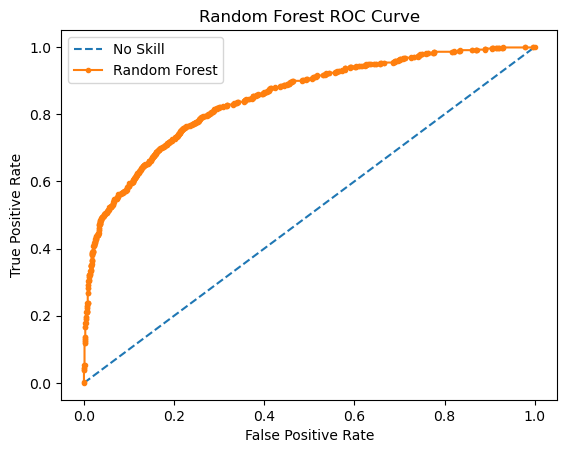

In [141]:
#ROC curve

ROC_curve(x4_test,y4_test, y_pred4,rf_model,'Random Forest')

##### Grid Search 

In [142]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [143]:
grid = GridSearchCV(estimator=rf,param_grid=params,cv = 4,n_jobs=-1,scoring="accuracy").fit(x4_train,y4_train)

In [144]:
rf_best = grid.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [145]:
grid.best_score_

0.8624285714285713

In [146]:
# building model after grid search

best_model=RandomForestClassifier(n_jobs=-1,min_samples_leaf=5,max_depth=5,n_estimators=50,random_state=42).fit(x4_train,y4_train)

In [147]:
#Predictions

y_pred04=best_model.predict(x4_test)
y_pred04

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [148]:
#Train accuracy

print('Train Score :',best_model.score(x4_train, y4_train))

Train Score : 0.8557142857142858


In [149]:
#Test Accuracy

print('Test Score :',best_model.score(x4_test, y4_test))

Test Score : 0.8436666666666667


In [150]:
#Confusion Matrix

con_matrix(y4_test,y_pred04)

[[2354   22]
 [ 447  177]]


TN: 2354 FP: 22 FN: 447 TP: 177


In [151]:
#Evaluation

evaluation(y4_test,y_pred04)

accuracy: 0.8436666666666667
recall: 0.28365384615384615
f1-score: 0.43013365735115433
precision: 0.8894472361809045


In [152]:
#ROC and AUC

ROC_AUC(x4_test,y4_test, y_pred04,best_model)

ROC:  0.8465450444617111
AUC:  0.6371972934472935


No Skill: ROC AUC=0.500
Random Forest GS : ROC AUC=0.847


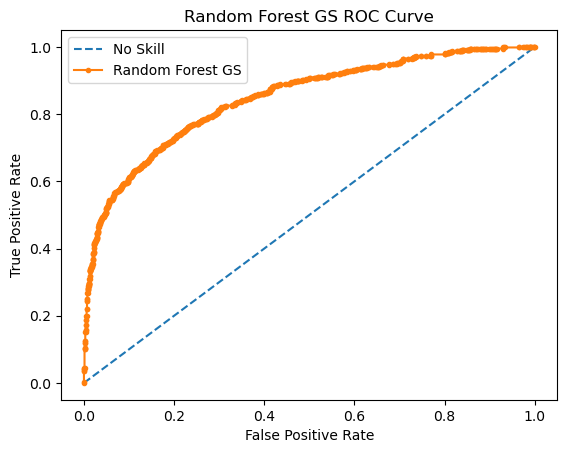

In [153]:
#ROC Curve

ROC_curve(x4_test,y4_test, y_pred04,best_model,'Random Forest GS')

##### Crossvalidation

In [154]:
crossval(RandomForestClassifier(),x4,y4)

Accuracy:  0.8602333333333334
F1_score:  0.5762756393821106


### BOOSTING

In [155]:
from sklearn.ensemble import AdaBoostClassifier

In [156]:
#feature selection

x5 = x0
y5 = y0

In [157]:
#splitting

x5_train,x5_test,y5_train,y5_test=train_test_split(x5,y5,train_size=0.70,random_state=100)
print("shape of the train and test dataset: ",x5_train.shape,x5_test.shape)

shape of the train and test dataset:  (7000, 13) (3000, 13)


In [158]:
#Building model

ada_model = AdaBoostClassifier().fit(x5_train,y5_train)

In [159]:
#predictions

y_pred5 = ada_model.predict(x5_test)
y_pred5

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [160]:
#Train accuracy

print('Train Score :',ada_model.score(x5_train, y5_train))

Train Score : 0.858


In [161]:
#Test Accuracy

print('Test Score :',ada_model.score(x5_test, y5_test))

Test Score : 0.859


In [162]:
#Confusion Matrix

con_matrix(y5_test,y_pred5)

[[2288   88]
 [ 335  289]]


TN: 2288 FP: 88 FN: 335 TP: 289


In [163]:
#Evaluation

evaluation(y5_test,y_pred5)

accuracy: 0.859
recall: 0.46314102564102566
f1-score: 0.5774225774225774
precision: 0.76657824933687


In [164]:
#ROC and AUC

ROC_AUC(x5_test,y5_test, y_pred5,ada_model)

ROC:  0.8483101582059915
AUC:  0.7130519943019943


No Skill: ROC AUC=0.500
Boosting : ROC AUC=0.848


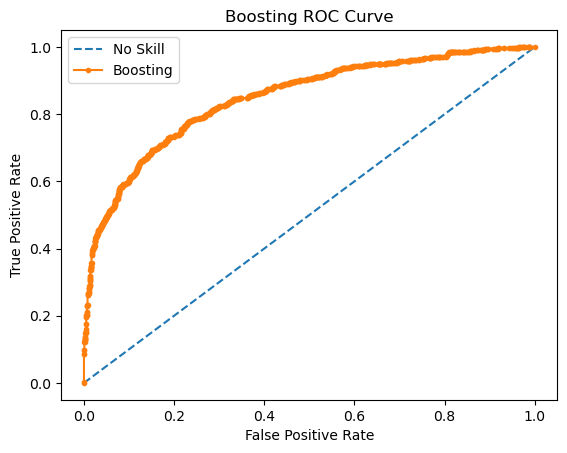

In [165]:
#ROC Curve

ROC_curve(x5_test,y5_test, y_pred5,ada_model,'Boosting')

##### Crossvalidation

In [166]:
crossval(AdaBoostClassifier(),x5,y5)

Accuracy:  0.8563666666666666
F1_score:  0.5705855694294605


### STACKING

In [167]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [168]:
#feature selection

x6 = x0
y6 = y0

In [169]:
#splitting

x6_train,x6_test,y6_train,y6_test=train_test_split(x6,y6,train_size=0.70,random_state=100)
print("shape of the train and test dataset: ",x6_train.shape,x6_test.shape)

shape of the train and test dataset:  (7000, 13) (3000, 13)


In [170]:
# building the model
def stacking():
    level0=[]
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('NB', GaussianNB()))
    level0.append(('svm', SVC()))
    level1=DecisionTreeClassifier()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [171]:
stack_model=stacking().fit(x6_train, y6_train)

In [172]:
#predictions

y_pred6 = stack_model.predict(x6_test)
y_pred6

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [173]:
#Train accuracy

print('Train Score :',stack_model.score(x6_train, y6_train))

Train Score : 0.7972857142857143


In [174]:
#Test Accuracy

print('Test Score :',stack_model.score(x6_test, y6_test))

Test Score : 0.7673333333333333


In [175]:
#Confusion Matrix

con_matrix(y6_test,y_pred6)

[[2060  316]
 [ 382  242]]


TN: 2060 FP: 316 FN: 382 TP: 242


In [176]:
#Evaluation

evaluation(y6_test,y_pred6)

accuracy: 0.7673333333333333
recall: 0.38782051282051283
f1-score: 0.4094754653130288
precision: 0.4336917562724014


In [177]:
#ROC and AUC

ROC_AUC(x6_test,y6_test, y_pred6,stack_model)

ROC:  0.6274119399119399
AUC:  0.6274119399119399


No Skill: ROC AUC=0.500
Stacking : ROC AUC=0.627


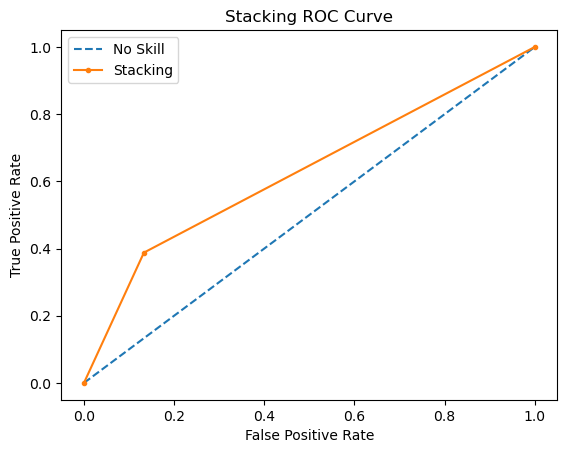

In [178]:
#ROC Curve

ROC_curve(x6_test,y6_test, y_pred6,stack_model,'Stacking')

##### Crossvalidation

In [179]:
crossval(stacking(),x6,y6)

Accuracy:  0.7688
F1_score:  0.4500209615908692


### K NEAREST NEIGHBOUR

In [180]:
#feature selection

x7 = x0
y7 = y0

In [181]:
#splitting

x7_train,x7_test,y7_train,y7_test=train_test_split(x7,y7,train_size=0.70,random_state=100)
print("shape of the train and test dataset: ",x7_train.shape,x7_test.shape)

shape of the train and test dataset:  (7000, 13) (3000, 13)


Minimum error:- 0.18233333333333332 at K = 9


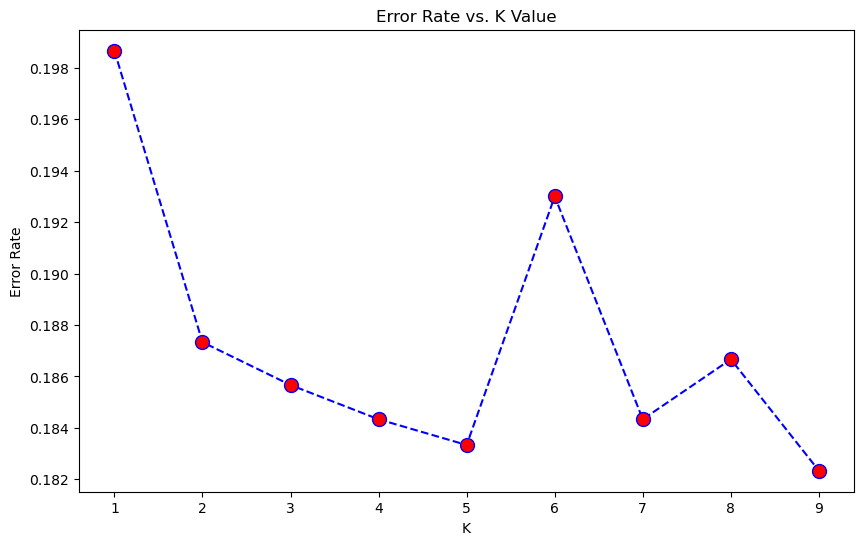

In [182]:
#Finding k

from sklearn import neighbors

error_rate = []
for i in range(1,10):
    model = neighbors.KNeighborsClassifier(n_neighbors=i)
    model.fit(x7_train,y7_train)
    y_pred = model.predict(x7_test)
    error_rate.append(np.mean(y_pred != y7_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [183]:
# building the model
k = 5
knn = neighbors.KNeighborsClassifier(k).fit(x7_train,y7_train)

In [184]:
#predictions

y_pred7 = knn.predict(x7_test)
y_pred7

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [185]:
#Train accuracy

print('Train Score :',knn.score(x7_train, y7_train))

Train Score : 0.866


In [186]:
#Test Accuracy

print('Test Score :',knn.score(x7_test, y7_test))

Test Score : 0.8166666666666667


In [187]:
#Confusion Matrix

con_matrix(y7_test,y_pred7)

[[2263  113]
 [ 437  187]]


TN: 2263 FP: 113 FN: 437 TP: 187


In [188]:
#Evaluation

evaluation(y7_test,y_pred7)

accuracy: 0.8166666666666667
recall: 0.29967948717948717
f1-score: 0.4047619047619047
precision: 0.6233333333333333


In [189]:
#ROC and AUC

ROC_AUC(x7_test,y7_test, y_pred7,knn)

ROC:  0.7546869604161272
AUC:  0.6260602823102823


No Skill: ROC AUC=0.500
KNN : ROC AUC=0.755


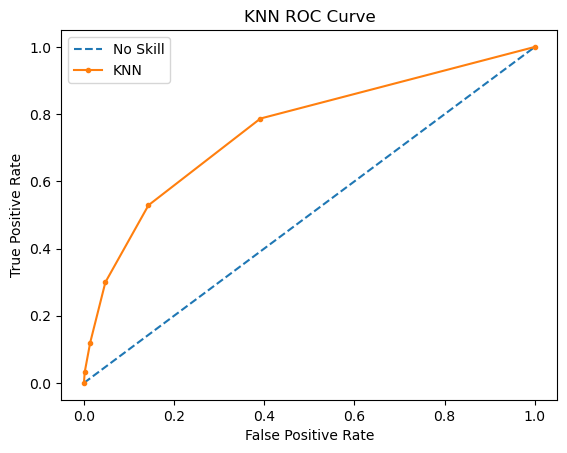

In [190]:
#ROC Curve

ROC_curve(x7_test,y7_test, y_pred7,knn,'KNN')

##### Crossvalidation

In [191]:
crossval(neighbors.KNeighborsClassifier(5),x7,y7)

Accuracy:  0.8131
F1_score:  0.405784246557722
